In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [ ]:
file_path = r"C:\Users\aekmo\Downloads\archive\IMDB Dataset.csv"  # Ganti path sesuai lokasi Anda
df = pd.read_csv(file_path)

In [24]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [28]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


C:\Users\aekmo\AppData\Local\Temp\ipykernel_15808\2734333788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=['blue', 'gold'])


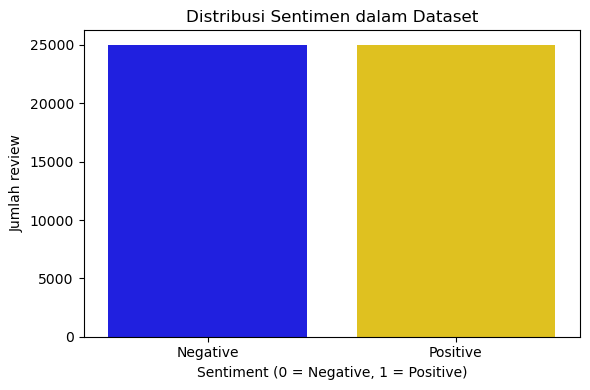


Persentase Distribusi Sentimen:
sentiment
1    50.0
0    50.0
Name: proportion, dtype: float64


In [ ]:
df = df[['review', 'sentiment']]

df['review'] = df['review'].str.lower()

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])  
# Positif = 1, Negatif = 0

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette=['blue', 'gold'])
plt.title('Distribusi Sentimen dalam Dataset')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Jumlah review')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.tight_layout()
plt.show()

class_counts = df['sentiment'].value_counts(normalize=True) * 100
print("\nPersentase Distribusi Sentimen:")
print(class_counts)

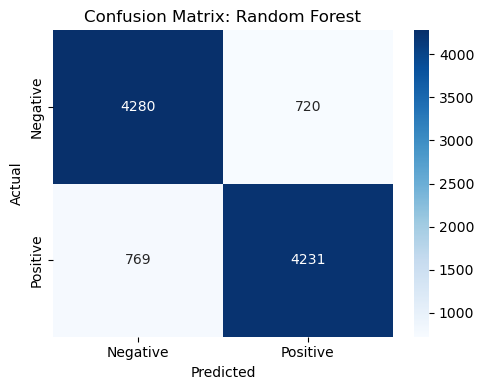


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.85      5000
    Positive       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

------------------------------------------------------------


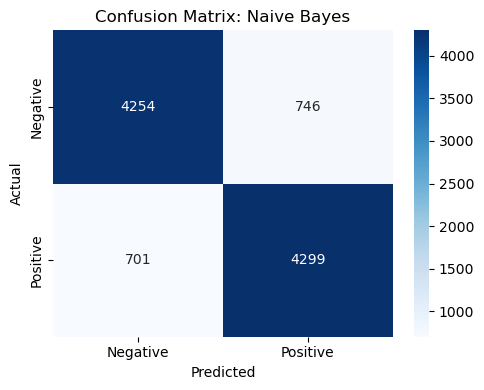


=== Classification Report: Naive Bayes ===
              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      5000
    Positive       0.85      0.86      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

------------------------------------------------------------

Ringkasan Evaluasi Model
        Model  Accuracy  Precision  Recall  F1-Score  Training Time (s)  Prediction Time (s)
Random Forest    0.8511   0.854575  0.8462  0.850367         155.357618             0.611364
  Naive Bayes    0.8553   0.852131  0.8598  0.855948           0.025995             0.004156


In [46]:
#Pisahkan fitur dan target 
X_text = df['review']
y = df['sentiment']

#Melakukan TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_text)

#Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Deklarasi model 
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': MultinomialNB()
}

#Pelatihan, Prediksi, Evaluasi ======
results = []

for model_name, model in models.items():
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    training_time = end_train - start_train

    #Prediksi
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()
    prediction_time = end_pred - start_pred

    #Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #Simpan hasil
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': training_time,
        'Prediction Time (s)': prediction_time
    })

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.tight_layout()
    plt.show()

    #Laporan Klasifikasi
    print(f"\n=== Classification Report: {model_name} ===")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    print("-" * 60)

#Ringkasan Evaluasi
results_df = pd.DataFrame(results)
print("\nRingkasan Evaluasi Model")
print(results_df.to_string(index=False))

In [33]:
model.fit(X_train, y_train)

#Hitung akurasi pada data training
train_accuracy = model.score(X_train, y_train)

#Hitung akurasi pada data testing
test_accuracy = model.score(X_test, y_test)

#Tampilkan hasilnya
print(f"Akurasi Training: {train_accuracy * 100:.2f}%")
print(f"Akurasi Testing : {test_accuracy  * 100:.2f}%")

Akurasi Training: 85.99%
Akurasi Testing : 85.53%
